###Write text it to csv

In [1]:

import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  precision_recall_curve, roc_auc_score, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score,auc, roc_curve, plot_confusion_matrix
%matplotlib inline


# Cleaning the data format 
with open('/content/drive/MyDrive/TableF7-3.txt', 'r') as f:
    data = f.readlines()

# write the data into CSV file 
for i in range(len(data)):

  feilds = data[i].split(',')

  with open(r'bank_data.csv', 'a') as f:
      writer = csv.writer(f)
      writer.writerow(feilds)


## Read Data



In [2]:
data = pd.read_csv("/content/bank_data.csv")

##EDA: Explaratory Data Analysis


In [3]:
data.head()


,CARDHLDR,DEFAULT,AGE,ACADMOS,ADEPCNT,MAJORDRG,MINORDRG,OWNRENT,INCOME,SELFEMPL,INCPER,EXP_INC,SPENDING,LOGSPEND \n
0,0,0,27.250000,4,0,0,0,0,1200.000000,0,18000.0,0.000667,,\n
1,0,0,40.833332,111,3,0,0,1,4000.000000,0,13500.0,0.000222,,\n
2,1,0,37.666668,54,3,0,0,1,3666.666667,0,11300.0,0.033270,121.9896773,4.8039364 \n
3,1,0,42.500000,60,3,0,0,1,2000.000000,0,17250.0,0.048427,96.8536213,4.5732008 \n
4,1,0,21.333334,8,0,0,0,0,2916.666667,0,35000.0,0.016523,48.1916700,3.8751862 \n


In [4]:
data.describe()

,CARDHLDR,DEFAULT,AGE,ACADMOS,ADEPCNT,MAJORDRG,MINORDRG,OWNRENT,INCOME,SELFEMPL,INCPER,EXP_INC
count,13444.000000,13444.000000,13444.000000,13444.000000,13444.000000,13444.000000,13444.000000,13444.000000,13444.000000,13444.000000,13444.000000,13444.000000
mean,0.780943,0.074085,33.471828,55.318878,1.017257,0.462809,0.290539,0.455965,2509.527819,0.057944,21719.680793,0.070974
std,0.413623,0.261919,10.226484,63.089729,1.279098,1.432724,0.767620,0.498076,1252.946716,0.233646,13591.209469,0.103922
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,362.500000,0.000088
25%,1.000000,0.000000,25.666666,12.000000,0.000000,0.000000,0.000000,0.000000,1666.666667,0.000000,12000.000000,0.002706
50%,1.000000,0.000000,31.500000,30.000000,1.000000,0.000000,0.000000,0.000000,2166.666667,0.000000,19000.000000,0.039286
75%,1.000000,0.000000,39.333332,72.000000,2.000000,0.000000,0.000000,1.000000,2916.666667,0.000000,27658.666504,0.095655
max,1.000000,1.000000,88.666664,576.000000,9.000000,22.000000,11.000000,1.000000,8333.250000,1.000000,150000.000000,2.037728


In [5]:
 # Looking for missing data
data.isnull().sum(axis=0)


CARDHLDR       0
DEFAULT        0
AGE            0
ACADMOS        0
ADEPCNT        0
MAJORDRG       0
MINORDRG       0
OWNRENT        0
INCOME         0
SELFEMPL       0
INCPER         0
EXP_INC        0
SPENDING       0
LOGSPEND \n    0
dtype: int64

In [6]:
# Finding duplicate values
data.duplicated().sum()

0

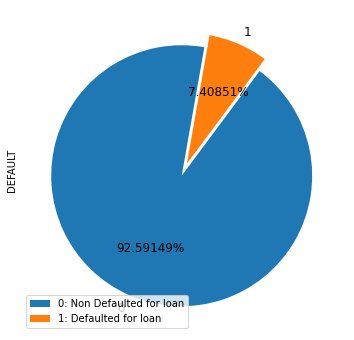

In [7]:
# Checking data balance  
data.DEFAULT.value_counts().plot(kind='pie', subplots=True, autopct='%1.5f%%', explode= (0.05, 0.05), startangle=80, legend=True, fontsize=12, figsize=(14,6), textprops={'color':"black"})
plt.legend(["0: Non Defaulted for loan","1: Defaulted for loan"]);


The Data is *imbalanced* with its classes only 7.4% is eligible of loan 

In [ ]:
data.dtypes.sort_values(ascending=True)

CARDHLDR         int64
DEFAULT          int64
ACADMOS          int64
ADEPCNT          int64
MAJORDRG         int64
MINORDRG         int64
OWNRENT          int64
SELFEMPL         int64
AGE            float64
INCOME         float64
INCPER         float64
EXP_INC        float64
SPENDING        object
LOGSPEND \n     object
dtype: object

Data Needs to be formatted to meaningful types

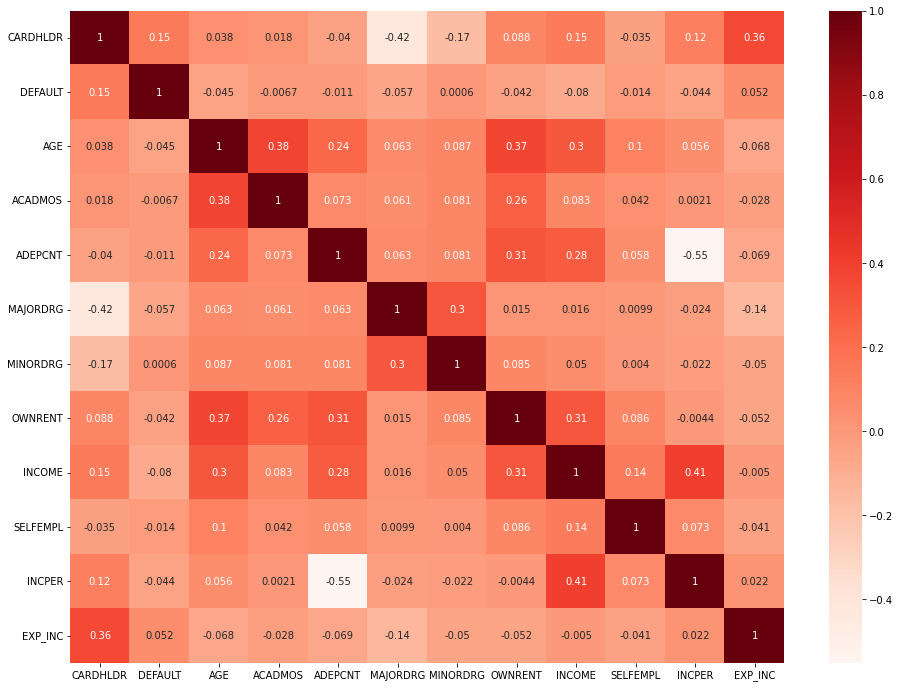

In [ ]:
#Using Pearson Correlation
plt.figure(figsize=(16,12))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()


The above correlation depicts that there is weak correlation between DEFAULT  and all other attrubuites, None of them will be removed.


In [ ]:
import plotly.express as px

#Scatterplot matrix
fig = px.scatter_matrix(data, dimensions=['CARDHLDR','DEFAULT'	,'AGE'	,'ACADMOS'	,'ADEPCNT'	,'MAJORDRG'	,'MINORDRG'	,'OWNRENT'	,'INCOME'	,'SELFEMPL'	,'INCPER',	'EXP_INC',	'SPENDING'	,'LOGSPEND \n'],
labels={col:col.replace('_', ' ') for col in data.columns},height=900, color="DEFAULT", color_continuous_scale=px.colors.diverging.Tealrose)
fig.show()


**Looks like ACADMOS have some outliuers let's check it**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



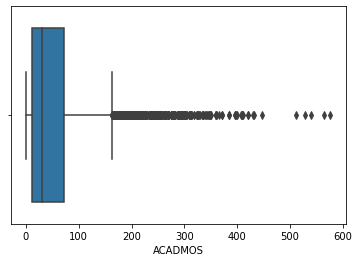

In [ ]:

import seaborn as sns
sns.boxplot(data['ACADMOS'])

**As we can clearly see the values above 420 are outliuers**


In [ ]:
# remove ACADMOS outliuers
data = data.loc[data['ACADMOS']<420,:]


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



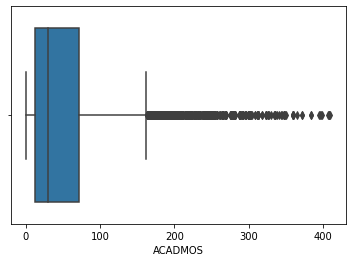

In [ ]:
import seaborn as sns
sns.boxplot(data['ACADMOS'])

##Preparing the Data for training 

In [ ]:

# Filling null values with 0 in SPENDING and LOGSPEND
data['LOGSPEND \n'] = pd.to_numeric(data['LOGSPEND \n'],errors='coerce')
data["LOGSPEND \n"].fillna(value = 0, inplace = True)


In [ ]:

def repalce_null_with_zero(data,cloumn):
    data[cloumn].fillna(value = 0, inplace = True)
    data[cloumn].replace(" ",0,inplace = True)
    data[cloumn] = data[cloumn].astype(float)
    return data

repalce_null_with_zero(data, "SPENDING")


,CARDHLDR,DEFAULT,AGE,ACADMOS,ADEPCNT,MAJORDRG,MINORDRG,OWNRENT,INCOME,SELFEMPL,INCPER,EXP_INC,SPENDING,LOGSPEND \n
0,0,0,27.250000,4,0,0,0,0,1200.000000,0,18000.000000,0.000667,0.000000,0.000000
1,0,0,40.833332,111,3,0,0,1,4000.000000,0,13500.000000,0.000222,0.000000,0.000000
2,1,0,37.666668,54,3,0,0,1,3666.666667,0,11300.000000,0.033270,121.989677,4.803936
3,1,0,42.500000,60,3,0,0,1,2000.000000,0,17250.000000,0.048427,96.853621,4.573201
4,1,0,21.333334,8,0,0,0,0,2916.666667,0,35000.000000,0.016523,48.191670,3.875186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13439,1,0,41.750000,12,1,0,0,0,2083.333333,1,12500.000000,0.047914,99.821668,4.603385
13440,1,0,48.500000,66,1,0,1,1,2583.333333,0,15500.000000,0.020469,52.879166,3.968009
13441,1,0,48.250000,2,2,0,0,1,3083.333333,0,12333.333008,0.111619,344.157490,5.841099
13442,1,0,24.833334,38,0,0,0,1,1416.666667,0,17000.000000,0.013096,18.552501,2.920605


In [ ]:
data.dtypes.sort_values(ascending=True)

CARDHLDR         int64
DEFAULT          int64
ACADMOS          int64
ADEPCNT          int64
MAJORDRG         int64
MINORDRG         int64
OWNRENT          int64
SELFEMPL         int64
AGE            float64
INCOME         float64
INCPER         float64
EXP_INC        float64
SPENDING       float64
LOGSPEND \n    float64
dtype: object

In [ ]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

# Dividing the dataset in train (75%) and test (25%)
Target = data['DEFAULT']
data = data.drop(['DEFAULT'], axis = 1)
# making sure that the classes are splitted in balanced way between training and testing
X_train, X_test, y_train, y_test = train_test_split(data,Target, test_size = 0.25, random_state = 42,stratify=Target)

# Normalizing the train and test data
scaler_lr = StandardScaler()

features_names = [ 'AGE', 'ACADMOS', 'ADEPCNT','MAJORDRG', 'MINORDRG',
         'INCOME','INCPER', 'EXP_INC', 'SPENDING','LOGSPEND \n']

X_train[features_names] = scaler_lr.fit_transform(X_train[features_names])
X_test[features_names] = scaler_lr.transform(X_test[features_names])


In [ ]:
X_train

,CARDHLDR,AGE,ACADMOS,ADEPCNT,MAJORDRG,MINORDRG,OWNRENT,INCOME,SELFEMPL,INCPER,EXP_INC,SPENDING,LOGSPEND \n
3695,1,-0.701567,-0.564540,-0.011672,1.066015,-0.380336,0,0.905777,0,0.023300,3.317203,5.017339,1.570335
11356,1,-1.003794,-0.806373,-0.795612,-0.323300,-0.380336,1,-0.209834,0,0.395133,-0.242820,-0.272765,0.407929
2887,1,-1.060972,2.401948,-0.795612,-0.323300,-0.380336,1,-0.012961,0,0.618232,-0.448019,-0.428548,0.183109
7811,1,-0.333993,-0.500051,0.772269,-0.323300,-0.380336,0,-0.275458,0,-0.968254,0.589996,0.410915,0.849444
11979,1,2.655605,0.838093,-0.795612,-0.323300,-0.380336,1,-0.360769,0,0.387696,1.375369,0.982774,1.034575
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1120,1,-1.003794,-0.854740,-0.795612,0.371357,-0.380336,0,-0.275458,0,0.320766,0.522274,0.354165,0.825869
10521,1,0.131600,0.338304,2.340150,-0.323300,-0.380336,0,-0.406706,1,-1.255805,0.187480,0.017460,0.651008
12611,1,0.164273,-0.274340,-0.795612,-0.323300,-0.380336,1,-0.373894,0,0.209216,-0.598779,-0.589363,-0.344891
4033,1,0.041749,-0.500051,0.772269,-0.323300,-0.380336,1,0.971401,1,-0.497266,-0.491028,-0.377012,0.271100


## Experiments 

In [ ]:
#Given that we have unbalanced data, AUC ROC as the best metric to evaluate the performance of the following models
def auc_roc_plot(y_test, y_preds):
    fpr, tpr, thresholds = roc_curve(y_test,y_preds)
    roc_auc = auc(fpr, tpr)
    print(roc_auc)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1])
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    return float(roc_auc)


0.7391004532599853


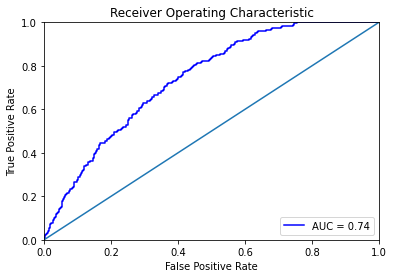

In [ ]:
# LogisticRegression model
lr = LogisticRegression(max_iter = 100 , random_state = 42, class_weight = 'balanced' )
parameters = {'C':[0.001, 0.01, 0.1, 1, 10, 100], 'solver':['newton-cg', 'lbfgs', 'liblinear']}
clf_lr = GridSearchCV(lr, parameters, cv = 5,scoring='accuracy',error_score=0).fit(X_train, y_train)

y_preds = clf_lr.predict_proba(X_test)[:,1]
auc_lr = auc_roc_plot(y_test, y_preds)


[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]0.6428802024819535


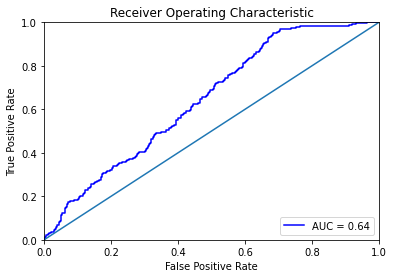

In [ ]:
from sklearn.svm import SVC
svc = SVC(random_state=42,probability=True, verbose=True)
parameters = {'C':[0.1, 1, 10], 'kernel': ['poly', 'rbf', 'sigmoid'],'gamma' : ['scale']}
clf = GridSearchCV(svc, parameters, cv = 5).fit(X_train, y_train)


y_preds = clf.predict_proba(X_test)[:,1]

auc_svc = auc_roc_plot(y_test, y_preds)


0.6816313485453066


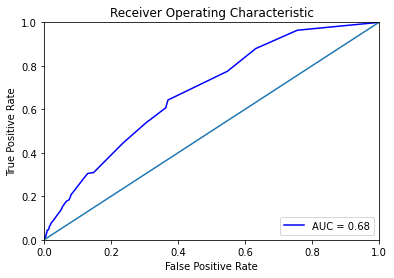

In [ ]:
from sklearn import tree

clf_tree = tree.DecisionTreeClassifier(random_state = 42, max_depth = 8).fit(X_train, y_train)
clf_tree.score(X_test, y_test)
y_preds = clf_tree.predict_proba(X_test)[:,1]

auc_tree = auc_roc_plot(y_test, y_preds)


0.7016813233641963


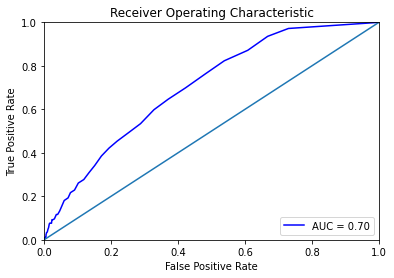

In [ ]:
rf = RandomForestClassifier(random_state = 42, class_weight = 'balanced').fit(X_train, y_train)
parameters = {'n_estimators':[10, 100, 300, 1000], 'max_features' : ['sqrt', 'log2']} 
clf_rf = GridSearchCV(rf, parameters, cv = 5).fit(X_train, y_train)
y_preds_rf = clf_rf.predict_proba(X_test)[:,1]
auc_random_forest = auc_roc_plot(y_test, y_preds_rf)


0.7008832758687483


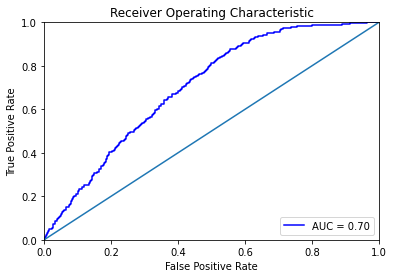

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp_nn = MLPClassifier( random_state = 42, max_iter = 1000 )

parameters = {'hidden_layer_sizes': [(20,), (20,10)], 'learning_rate_init':[0.0001, 0.001, 0.01, 0.1],'solver':['adam','sgd']}
clf_nn = GridSearchCV(mlp_nn, parameters, cv = 5).fit(X_train, y_train)
y_preds = clf_nn.predict_proba(X_test)[:,1]
auc_nn = auc_roc_plot(y_test, y_preds)


0.7454273686385413


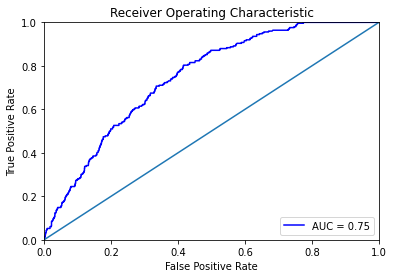

In [ ]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier( random_state=42)
parameters= {'objective':["binary:logistic"]}
clf_xgb = GridSearchCV(xgb_model, parameters, cv = 5).fit(X_train, y_train)
y_preds = clf_xgb.predict_proba(X_test)[:,1]

auc_xgb = auc_roc_plot(y_test, y_preds)


0.7131587443019667


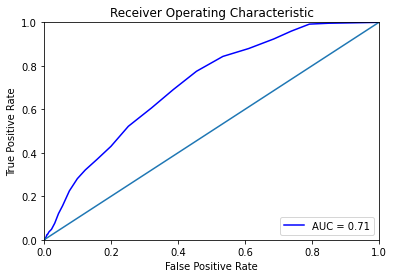

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier()
parameters = {'algorithm':['auto', 'ball_tree','kd_tree'],'n_neighbors':[5,100,200]}

clf_knn = GridSearchCV(neigh, parameters, cv = 5).fit(X_train, y_train)
y_preds = clf_knn.predict_proba(X_test)[:,1]
auc_knn = auc_roc_plot(y_test, y_preds)


## Results

<function matplotlib.pyplot.show(*args, **kw)>

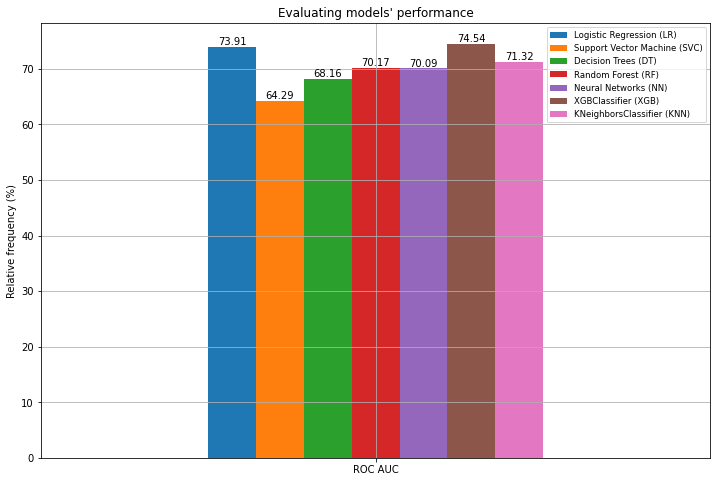

In [ ]:
 # Creating table for graphic visualization
results_2 = {'Classifier': ['ROC AUC'], 'Logistic Regression (LR)': [auc_lr*100],  'Support Vector Machine (SVC)': [auc_svc*100], 'Decision Trees (DT)': [auc_tree*100], 'Random Forest (RF)': [auc_random_forest*100], 'Neural Networks (NN)': [auc_nn*100], 'XGBClassifier (XGB)':[auc_xgb*100],'KNeighborsClassifier (KNN)':[auc_knn*100]}
df2 = pd.DataFrame(results_2, columns = ['Classifier', 'Logistic Regression (LR)', 'Support Vector Machine (SVC)', 'Decision Trees (DT)', 'Random Forest (RF)', 'Neural Networks (NN)','XGBClassifier (XGB)','KNeighborsClassifier (KNN)'])
df2.set_index("Classifier", inplace=True)
results_2 = df2

# Display tHe graph
ax = results_2.plot(kind="bar", title=("Evaluating models' performance"), figsize=(12,8) ,fontsize=10, grid=True)
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.legend(fontsize=8.5, loc="upper right")
plt.xlabel('')
plt.xticks(rotation='horizontal')
plt.ylabel('Relative frequency (%)')
plt.show

**As we can clearly see XGBClassifier outpreformed the rest of the models with  ~ 74.54% testing accuracy**

**The rule is the higher the value of the ROC AUC metric, the better. If a random model would show 0.5, a perfect model would achieve 1.0.**